# Student Stress EDA: Data Analysis

## Введение

Психическое здоровье студентов - одна из ключевых тем современного образования.
Высокая учебная нагрузка, социальные факторы и особенности образа жизни напрямую отражаются на эмоциональном состоянии учащихся и могут становиться причиной психологических трудностей.

В рамках данного проекта будет проведён анализ данных о психическом здоровье студентов колледжей.

Цель - выявить факторы риска и закономерности, связанные с развитием депрессивных состояний.

Используемые инструменты: pandas, matplotlib, seaborn



## Работа с датасетом

1. Импорт библиотек

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  


2. Загрузка датасета

In [14]:
df = pd.read_csv('data/Stress_Dataset.csv')
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [15]:
df.duplicated().sum()

np.int64(27)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                816 non-null    int64 
 1   Age                                                                   816 non-null    int64 
 2   Have you recently experienced stress in your life?                    816 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   816 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               816 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        816 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             816 non-null    int64 
 7   Have you been

Почистили данные от дупликатов и проверили на пропуски

In [18]:
df.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,0.356618,20.080882,3.018382,2.761029,2.541667,2.796569,2.664216,2.622549,2.672794,2.691176,...,2.502451,2.447304,2.487745,2.514706,2.425245,2.580882,2.623775,2.752451,3.257353,2.403186
std,0.479294,5.513025,1.128941,1.123317,1.209666,1.254308,1.261995,1.257003,1.303904,1.303218,...,1.240421,1.196997,1.197071,1.249208,1.257829,1.283526,1.299126,1.261995,1.206300,1.117815
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Из описательной статистики датасета видно, что распределенние по возрасту включает себя выбросы. Так как мы анализируем выборку студентов, то будем вынуждены избавиться от выбросов или как-то их отдельно вывести

## Разведочный анализ данных






1. Возраст участников


In [19]:
df['Age'].value_counts()

Age
19     274
20     229
21     116
18     109
17      26
22      24
28       6
24       6
15       6
36       4
14       4
32       3
41       3
37       3
100      3
Name: count, dtype: int64

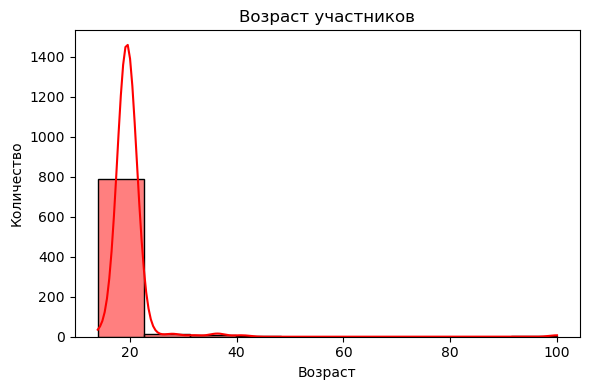

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='red')
plt.title('Возраст участников')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

In [21]:
df = df[df['Age']<23]
df = df[df['Age']>16]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                778 non-null    int64 
 1   Age                                                                   778 non-null    int64 
 2   Have you recently experienced stress in your life?                    778 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   778 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               778 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        778 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             778 non-null    int64 
 7   Have you been

2. Пол участников

In [22]:
df['Gender'].value_counts()

Gender
0    500
1    278
Name: count, dtype: int64

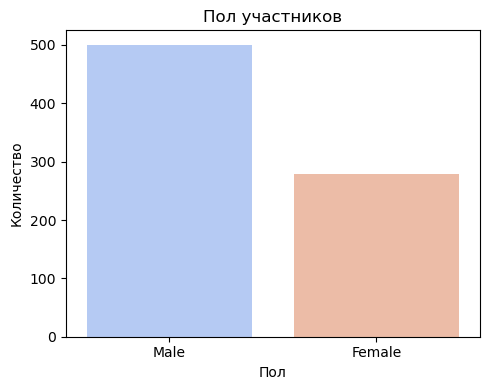

In [23]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Пол участников')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Male', 'Female']) 
plt.tight_layout()
plt.show()

К сожалению пол участников неуравновешенный, то могут возникнуть проблемы с построением модели машинного обучения в этом датасете